# Visualization of classification results
The three analyses - the benchmark, ROI-average, and cluster-average analysis - are visualized below.

In [53]:
# Importing packages
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
from matplotlib import lines
from scipy.stats import linregress as linregress
import pandas as pd
import numpy as np
import os
from os.path import join as opj
import seaborn as sns
colors = sns.color_palette()

home = os.path.expanduser('~')
resultsdir = opj(home, 'Dropbox', 'ResMas_UvA', 'Thesis', 'Git', 'Analysis_results')

## 1. Benchmark analysis

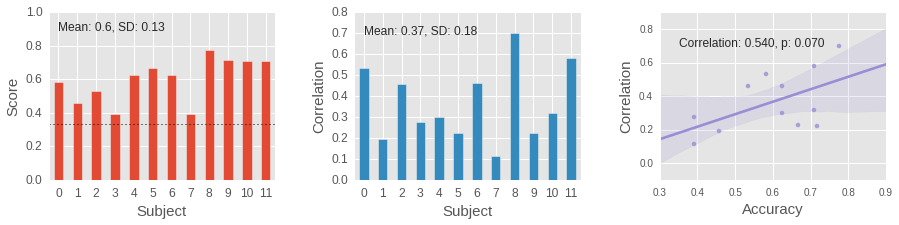

In [70]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'benchmark_results.csv')
data = pd.read_csv(filepath, sep=',', skiprows=22)
data = data.dropna(how='any')
data['fs_count'] = data['fs_count'].astype(float)
data['sub_name'] = np.arange(len(data.index))

# Plotting accuracy and number of features
mean_score = np.round(data['accuracy'].mean(), 2)
std_score = np.round(data['accuracy'].std(), 2)
mean_feat = np.round(data['fs_count'].mean(), 0)
std_feat = np.round(data['fs_count'].std(), 0)
mean_corr = np.round(data['corr_vox'].mean(), 2)
std_corr = np.round(data['corr_vox'].std(), 2)

fig, axes = plt.subplots(1,3)

data.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(15, 3))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

'''
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %s, SD: %s' % (mean_feat, std_feat), size=12)
'''

data.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

slope, intercept, r, p, stderr = linregress(data['accuracy'], data['corr_vox'])
axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data, color=colors[2])
axes[2].set_xlabel('Accuracy', fontsize=15)
axes[2].set_ylabel('Correlation', fontsize=15)
axes[2].text(.35, 0.7, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'benchmark_plot.png'), dpi=600, bbox_inches='tight')


## 2. ROI-average analysis


           accuracy  corr_vox  fs_count   fs_prop    fs_std  precision  \
accuracy   1.000000 -0.114499 -0.255882 -0.252575 -0.640780   0.999511   
corr_vox  -0.114499  1.000000  0.631103  0.629857 -0.054078  -0.121167   
fs_count  -0.255882  0.631103  1.000000  0.999970  0.158499  -0.258315   
fs_prop   -0.252575  0.629857  0.999970  1.000000  0.155790  -0.254932   
fs_std    -0.640780 -0.054078  0.158499  0.155790  1.000000  -0.644192   
precision  0.999511 -0.121167 -0.258315 -0.254932 -0.644192   1.000000   
recall     1.000000 -0.114499 -0.255882 -0.252575 -0.640780   0.999511   
sub_name   0.447792  0.288701  0.152995  0.152977 -0.377020   0.445045   

             recall  sub_name  
accuracy   1.000000  0.447792  
corr_vox  -0.114499  0.288701  
fs_count  -0.255882  0.152995  
fs_prop   -0.252575  0.152977  
fs_std    -0.640780 -0.377020  
precision  0.999511  0.445045  
recall     1.000000  0.447792  
sub_name   0.447792  1.000000  


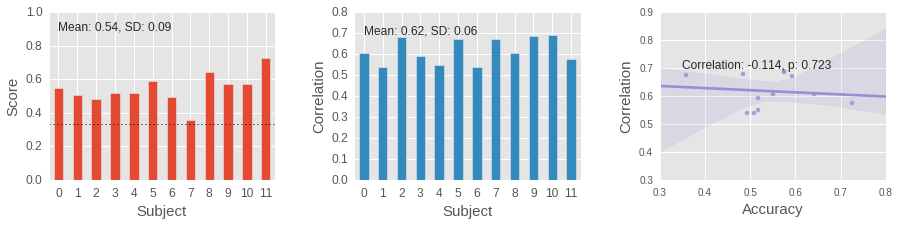

In [72]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'ROI_average_results.csv')
data = pd.read_csv(filepath, sep=',', skiprows=22)
data = data.dropna(how='any')
data['fs_count'] = data['fs_count'].astype(float)
data['sub_name'] = np.arange(len(data.index))

# Plotting accuracy and number of features
mean_score = np.round(data['accuracy'].mean(), 2)
std_score = np.round(data['accuracy'].std(), 2)
mean_feat = np.round(data['fs_count'].mean(), 0)
std_feat = np.round(data['fs_count'].std(), 0)
mean_corr = np.round(data['corr_vox'].mean(), 2)
std_corr = np.round(data['corr_vox'].std(), 2)

fig, axes = plt.subplots(1,3)

data.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(15, 3))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

'''
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %s, SD: %s' % (mean_feat, std_feat), size=12)
'''

data.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'ROI_average_plot.png'), dpi=600, bbox_inches='tight')

slope, intercept, r, p, stderr = linregress(data['accuracy'], data['corr_vox'])
axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data, color=colors[2])
axes[2].set_xlabel('Accuracy', fontsize=15)
axes[2].set_ylabel('Correlation', fontsize=15)
axes[2].text(.35, 0.7, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

print data.corr()

## 3. Cluster-average

               accuracy  cluster_count  corr_vox  fs_count  fs_prop    fs_std  \
accuracy       1.000000      -0.338993  0.378443 -0.338993      NaN -0.653242   
cluster_count -0.338993       1.000000 -0.318789  1.000000      NaN  0.507214   
corr_vox       0.378443      -0.318789  1.000000 -0.318780      NaN -0.604700   
fs_count      -0.338993       1.000000 -0.318780  1.000000      NaN  0.507203   
fs_prop             NaN            NaN       NaN       NaN      NaN       NaN   
fs_std        -0.653242       0.507214 -0.604700  0.507203      NaN  1.000000   
precision      0.999417      -0.340030  0.360495 -0.340031      NaN -0.642019   
recall         1.000000      -0.338993  0.378443 -0.338993      NaN -0.653242   
sub_name       0.489187      -0.082923 -0.309514 -0.082945      NaN -0.023772   

               precision    recall  sub_name  
accuracy        0.999417  1.000000  0.489187  
cluster_count  -0.340030 -0.338993 -0.082923  
corr_vox        0.360495  0.378443 -0.309514  
f

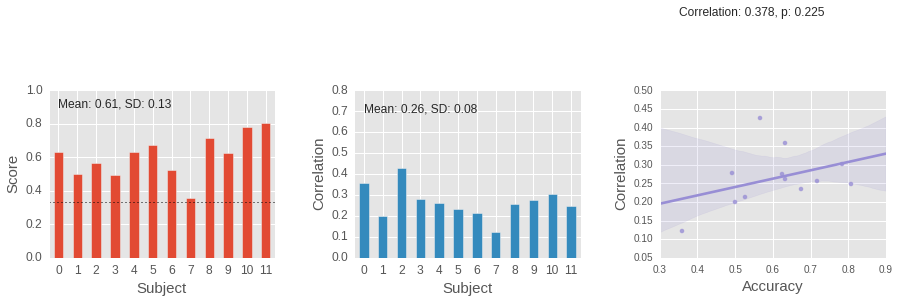

In [74]:
# Reading in data, some cleaning
filepath = opj(resultsdir, 'Cluster_average_results.csv')
data = pd.read_csv(filepath, sep=',', skiprows=22)
data = data.dropna(how='any')
data['fs_count'] = data['fs_count'].astype(float)
data['sub_name'] = np.arange(len(data.index))

# Plotting accuracy and number of features
mean_score = np.round(data['accuracy'].mean(), 2)
std_score = np.round(data['accuracy'].std(), 2)
mean_feat = np.round(data['fs_count'].mean(), 0)
std_feat = np.round(data['fs_count'].std(), 0)
mean_corr = np.round(data['corr_vox'].mean(), 2)
std_corr = np.round(data['corr_vox'].std(), 2)

fig, axes = plt.subplots(1,3)

data.plot(kind='bar', x='sub_name', y='accuracy', legend=False, rot=0, fontsize=12, 
          ylim=(0,1), ax=axes[0], figsize=(15, 3))

axes[0].axhline(y=0.333, c="black", linewidth=1, ls=':')
axes[0].set_ylabel('Score', fontsize=15)
axes[0].set_xlabel('Subject', fontsize=15)
axes[0].text(0, 0.9, 'Mean: %s, SD: %s' % (mean_score, std_score), size=12)

'''
data.plot(kind='bar', x='sub_name', y='fs_count', legend=False, 
              rot=0, fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('# Features', fontsize=15)
axes[1].text(0, 2250, 'Mean: %s, SD: %s' % (mean_feat, std_feat), size=12)
'''

data.plot(kind='bar', x='sub_name', y='corr_vox', legend=False, 
              rot=0, ylim=(0, 0.8), fontsize=12, ax=axes[1], color=colors[1])

axes[1].set_xlabel('Subject', fontsize=15)
axes[1].set_ylabel('Correlation', fontsize=15)
axes[1].text(0, 0.7, 'Mean: %s, SD: %s' % (mean_corr, std_corr), size=12)

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='on',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='on') # labels along the bottom edge are off

plt.tick_params(
    axis='y',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    left='on',      # ticks along the bottom edge are off
    right='off')

plt.subplots_adjust(wspace=0.35)
plt.savefig(opj(resultsdir, 'Cluster_average_plot.png'), dpi=600, bbox_inches='tight')

slope, intercept, r, p, stderr = linregress(data['accuracy'], data['corr_vox'])
axes[2] = sns.regplot(x='accuracy', y='corr_vox', data=data, color=colors[2])
axes[2].set_xlabel('Accuracy', fontsize=15)
axes[2].set_ylabel('Correlation', fontsize=15)
axes[2].text(.35, 0.7, 'Correlation: %.3f, p: %.3f' % (r, p), size=12)

print data.corr()